<a href="https://colab.research.google.com/github/noambassat/RAG_project/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain faiss-cpu transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 73.6 MB/s eta 0:00:00


In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.4 MB/s eta 0:00:00


In [3]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.47
    Uninstalling langchain-core-0.3.47:
      Successfully uninstalled langchain-core-0.3.47


In [4]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00


In [5]:
 !pip install adjustText

In [6]:

!pip install mlflow

!pip install faiss

!pip install transformers sentence-transformers

!pip install gitpython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.6/677.6 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s 

In [7]:
from langchain.embeddings import HuggingFaceEmbeddings, OpenAIEmbeddings
from langchain.embeddings.base import Embeddings
from transformers import AutoTokenizer, AutoModel, AutoTokenizer
from langchain.vectorstores import FAISS
import faiss
import torch
import numpy as np
from tqdm import tqdm
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from concurrent.futures import ThreadPoolExecutor, as_completed
from requests.adapters import HTTPAdapter, Retry
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive
from sentence_transformers import SentenceTransformer
import json
import random
import umap
from sklearn.preprocessing import MinMaxScaler
from adjustText import adjust_text
import time
import os
import pickle
from typing import List
import mlflow
from google.colab import userdata

path = "/content/drive/MyDrive/GitHubRepositoriesProject/"

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
clean_df = pd.read_excel("/content/drive/MyDrive/GitHubRepositoriesProject/clean_df.xlsx")

In [9]:
clean_df.shape

(11711, 11)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

### Preparing the **CustomCodeBERTEmbeddings** Model  
The **CodeBERT** model is designed for code-related data. It is based on **BERT** and trained with code data. This model allows generating representations of texts using a **tokenizer** and a **model**.  

### The **embed_documents** Function  
This function generates embeddings for each given text by:  
- **Tokenization:** Breaking down the text into tokens.  
- **Text Splitting:** Dividing texts based on length to fit the model’s input limit.  
- **Batch Processing:** Producing embeddings in batches to improve efficiency.

In [11]:
clean_df.dropna(subset = 'Topics',inplace = True)
clean_df.shape

(11699, 11)

In [12]:
clean_df.head(2)

Name                                        Description  \
0              PyPOTS  toolboxlibrary data mining partially observed ...   
1  changedetection.io  best simplest free open source website change ...   

                                              URL          Created At  \
0              https://github.com/WenjieDu/PyPOTS 2022-03-29 14:22:47   
1  https://github.com/dgtlmoon/changedetection.io 2021-01-27 16:03:30   

           Updated At  Size  Stars  \
0 2023-09-25 04:20:18  7812    438   
1 2023-09-21 11:00:40  6801  11908   

                                              Topics  Overlap_Score  \
0  classification, clustering, data mining, forec...             37   
1  back in stock, change alert, change detection,...             27   

                                        Common_Words  Year  
0  ['data', 'forecasting', 'incomplete', 'irregul...  2022  
1  ['change', 'defacement', 'detection', 'monitor...  2021

In [13]:
clean_df["Topics"].head()

0    classification, clustering, data mining, forec...
1    back in stock, change alert, change detection,...
2    aco, ant colony optimization, artificial bee c...
3    instagram, instagram api, instagram bot, insta...
4    dashboard, log analysis, log parsing, scrapy, ...
Name: Topics, dtype: object

### Understanding the Use Case  
The use case involves **highly specific technical categories** (algorithm names, library names, tool descriptions, etc.).  

### Why Simple Semantic Search Is Not Enough  
- Simple embeddings may not accurately capture the precise meaning of technical terms.  
- A model that understands technical terminology in depth is required (e.g., **CodeBERT**).  

### Evaluation Approach  
- Multiple indexes need to be evaluated to determine the most effective one.  
- Using **MLFlow** will be ideal for tracking experiments and comparing results.  

The plan is to build, test, and compare different index configurations to identify the most suitable setup for technical term retrieval.  

Would you like me to proceed with the implementation of this approach?

# Sampling

In [14]:
def radom_samplig(df):
  return df.sample(frac=0.1, random_state=42)

sample_df = radom_samplig(clean_df)
sample_df.shape

(1170, 11)

# Embeddings

### Embedding Models Overview  

1. **CodeBERT**  
   - Transformer-based model developed by Microsoft, trained on code-documentation pairs from public repositories.  
   - **Strengths:** Excellent understanding of technical terms and code, ideal for topics related to programming languages, libraries, and algorithms.  
   - **Source:** microsoft/codebert-base  

2. **SciBERT**  
   - Model by Allen Institute for AI, trained on scientific papers in computer science and biology.  
   - **Strengths:** Excels in understanding technical and scientific texts, suitable for topics with academic or research-related terminology.  
   - **Source:** allenai/scibert_scivocab_uncased  

3. **OpenAI's GPT Embeddings (text-embedding-ada-002)**  
   - Latest generation embedding model by OpenAI for high-quality general-purpose text embeddings.  
   - **Strengths:** Provides deep semantic understanding, suitable for various topics but requires access to OpenAI's API.  
   - **Source:** OpenAI API  

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:

def load_model_and_tokenizer(model_name, device):
    """ Load model and tokenizer from HuggingFace. """
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    return model, tokenizer

def generate_embeddings_for_topics(topics_list, model, tokenizer, device):
    embeddings = []
    for topics in topics_list:
        topic_embeddings = []
        for topic in topics:
            inputs = tokenizer(topic, return_tensors="pt", padding=True, truncation=True).to(device)
            with torch.no_grad():
                embedding = model(**inputs).last_hidden_state.mean(dim=1)
            topic_embeddings.append(embedding.cpu().numpy().flatten())

        # ממוצע האימבדינגים של כל הטופיקס
        avg_embedding = np.mean(topic_embeddings, axis=0)
        embeddings.append(avg_embedding)
    return embeddings


def generate_embeddings(df, embedding_type, batch_size=100, device=device, openai_api_key=userdata.get('open_ai_key')):

    if openai_api_key:
        os.environ["OPENAI_API_KEY"] = openai_api_key  # Set OpenAI API key if provided

    # Load the correct embedding model
    if embedding_type == "GPT":
        embedding_model = OpenAIEmbeddings(model = "text-embedding-ada-002")
    else:
        model_name = "microsoft/codebert-base" if embedding_type == "CodeBERT" else "allenai/scibert_scivocab_uncased"
        model, tokenizer = load_model_and_tokenizer(model_name, device)

    embedding_col = f"embedding_type_{embedding_type}"
        # Ensure any active MLFlow run is finished before starting a new one
    if mlflow.active_run() is not None:
        mlflow.end_run()

    # Start new run for the visualization
# Start new nested run
    with mlflow.start_run(run_name=f"Visualization - {embedding_col}", nested=True):
        mlflow.log_param("embedding_type", embedding_col)


        embeddings = []

        topics_list = df["Topics"].apply(lambda x: x if isinstance(x, list) else [x]).tolist()


        # Process in batches with tqdm
        for i in tqdm(range(0, len(topics_list), batch_size), desc=f"Generating Embeddings for {embedding_type}", ncols=100):
            batch = topics_list[i:i + batch_size]

            if embedding_type == "GPT":
                batch_embeddings = embedding_model.embed_documents([" ".join(topics) for topics in batch])
            else:
                batch_embeddings = generate_embeddings_for_topics(batch, model, tokenizer, device)

            embeddings.extend(batch_embeddings)

        mlflow.log_metric("num_documents", len(embeddings))
        df[embedding_col] = embeddings


        output_file = f"{embedding_type}_embeddings.xlsx"
        df.to_excel(output_file, index=False)
        mlflow.log_artifact(output_file)

    return df


In [17]:
for embedding_type in ["CodeBERT", "SciBERT", "GPT"]:
    sample_df = generate_embeddings(sample_df, embedding_type)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Generating Embeddings for CodeBERT:   0%|                                    | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Generating Embeddings for CodeBERT: 100%|███████████████████████████| 12/12 [00:11<00:00,  1.02it/s]


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Generating Embeddings for SciBERT:   8%|██▍                          | 1/12 [00:00<00:09,  1.22it/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Generating Embeddings for SciBERT: 100%|████████████████████████████| 12/12 [00:10<00:00,  1.20it/s]
<ipython-input-16-5fd770003bac>:30: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding_model = OpenAIEmbeddings(model = "text-embedding-ada-002")
Generating Embeddings for GPT: 100%|████████████████████████████████| 12/12 [00:29<00:00,  2.42s/it]


In [18]:
sample_df.head(3)

Name                                        Description  \
11513  fish-diffusion              easy understand tts svs svc framework   
2087           NNDIAL  nndial open source toolkit building end end tr...   
11323            mmkb                                data modalities kbs   

                                               URL          Created At  \
11513  https://github.com/fishaudio/fish-diffusion 2023-01-09 11:01:24   
2087            https://github.com/shawnwun/NNDIAL 2017-05-26 14:38:00   
11323             https://github.com/mniepert/mmkb 2018-02-21 12:33:24   

               Updated At   Size  Stars  \
11513 2023-09-24 01:44:44  64316    458   
2087  2023-09-01 08:40:42  73976    346   
11323 2023-09-18 04:12:17  34709    314   

                                                  Topics  Overlap_Score  \
11513                 diffusion, pytorch, soundgenerator              0   
2087   dialogue, dialogue agents, dialogue generation...              6   
11323                          freebase, knowledge graph              0   

                  Common_Words  Year  \
11513                       []  2023   
2087   ['dialogue', 'systems']  2017   
11323                       []  2018   

                                 embedding_type_CodeBERT  \
11513  [-0.17904958, 0.025005545, 0.43965673, 0.22487...   
2087   [-0.23475327, 0.05144652, 0.24216096, 0.262912...   
11323  [-0.035101186, 0.24884412, -0.0036410564, 0.21...   

                                  embedding_type_SciBERT  \
11513  [0.053714093, 0.085433334, 0.29141527, 1.08931...   
2087   [0.24996585, 0.52364385, 1.1472524, 0.16191079...   
11323  [-0.37098655, 0.6352393, 0.012849961, 0.187038...   

                                      embedding_type_GPT  
11513  [-0.022399829924088253, -0.010874174643773899,...  
2087   [-0.019865424245987043, -0.004319982778261262,...  
11323  [0.021632466988068352, -0.0075549545661174455,...

# Index vactors

1. **IndexFlatL2**  
Description: A simple index that performs exact searches by calculating Euclidean distance (L2) between vectors.  
Advantages: Provides fully accurate results.  
Disadvantages: Slow and inefficient for large datasets.  
Recommended Use: Best for small datasets when accuracy is the top priority.  

2. **IndexIVFPQ (Inverted File with Product Quantization)**  
Description: Combines inverted files with product quantization to reduce computations and speed up searches.  
Advantages: Fast searches on large datasets with reduced memory usage.  
Disadvantages: Requires training; accuracy depends on parameters like nlist (number of clusters) and nprobe (number of probes).  
Recommended Use: Suitable for large datasets where speed is important, with some accuracy compromise.  

3. **IndexHNSW (Hierarchical Navigable Small World)**  
Description: Graph-based index enabling efficient approximate searches with sub-linear time complexity.  
Advantages: Good balance between speed and accuracy; ideal for approximate searches.  
Disadvantages: High memory consumption; doesn't support adding vectors with custom IDs.  
Recommended Use: Best when search speed is crucial, even if it slightly affects accuracy.  

In [19]:
def create_faiss_index(embeddings, index_type, nlist=100, nprobe=10, ef_search=200):

    embeddings = np.array(embeddings).astype('float32')
    dim = embeddings.shape[1]

    with mlflow.start_run(run_name=f"Index Creation - {index_type}"):
        mlflow.log_param("index_type", index_type)
        mlflow.log_param("embedding_dimension", dim)

        if index_type == 'FlatL2':
            index = faiss.IndexFlatL2(dim)
            mlflow.log_param("index_method", "FlatL2")

        elif index_type == 'IVFPQ':
            quantizer = faiss.IndexFlatL2(dim)
            index = faiss.IndexIVFPQ(quantizer, dim, nlist, 8, 8)
            index.train(embeddings)
            index.nprobe = nprobe

            mlflow.log_param("index_method", "IVFPQ")
            mlflow.log_param("nlist", nlist)
            mlflow.log_param("nprobe", nprobe)

        elif index_type == 'HNSW':
            index = faiss.IndexHNSWFlat(dim, 32)
            index.hnsw.efSearch = ef_search

            mlflow.log_param("index_method", "HNSW")
            mlflow.log_param("ef_search", ef_search)

        else:
            raise ValueError(f"Unsupported index type: {index_type}")

        index.add(embeddings)
        mlflow.log_metric("number_of_vectors", len(embeddings))
    mlflow.end_run()

    return index


def save_index(index, file_path):
    faiss.write_index(index, file_path)


def load_index(file_path):
    return faiss.read_index(file_path)



In [20]:
def process_all_indices(df, embedding_columns, index_types, output_folder):
    """
    Create and save all index combinations for given embeddings and index types.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # indexes = []
    for embedding_col in embedding_columns:
        embeddings = np.array(df[embedding_col].tolist()).astype('float32')
        for index_type in index_types:
            index = create_faiss_index(embeddings, index_type)

            # Save index with a meaningful name
            file_name = f"{embedding_col}_{index_type}.index"
            file_path = os.path.join(output_folder, file_name)
            save_index(index, file_path)
            # indexes.append(index)

    if(len(index_types)==1):
      df["index"] = index

    return df

In [21]:
embedding_columns = ['embedding_type_CodeBERT', 'embedding_type_SciBERT', 'embedding_type_GPT']
index_types = ['FlatL2', 'IVFPQ', 'HNSW']
process_all_indices(sample_df, embedding_columns, index_types, output_folder="indexes")

Name  \
11513                                     fish-diffusion   
2087                                              NNDIAL   
11323                                               mmkb   
5146                                        torchdistill   
5121                                   Efficient-CapsNet   
7954                                       FastWordQuery   
5676                                            organize   
9894                                                 pyp   
11635                                        PhotoSketch   
2357                                               SegAN   
3131                            ICCV2019-LearningToPaint   
8649                                          ShuffleNet   
379                                   Parallel-Tacotron2   
5623                          Solo-Performance-Prompting   
11392                                           qa_match   
8721                                               GODEL   
1623                                         RpiMotorLib   
10816                                     ml-yearning-vi   
6502                                              pyobjc   
4989                               openapi-python-client   
4536                                         ema-pytorch   
2377                                        django-flags   
6222                    google-it-automation-with-python   
10901                                       yolov7_plate   
3184                                             dvector   
8836                                          shotlooter   
11270                                 Transformer-Clinic   
9303                                              rattle   
4793                            AttentionalPoolingAction   
2406                                           keras-fcn   
10869                                           Decodify   
1139                            tradingview-webhooks-bot   
2388                                                ENet   
9096                                        py-denseflow   
8718                                       spatialpandas   
7948                                       pytorch-adapt   
5524                                 Neural-Localization   
1683                                              EuroPi   
11598                                          sidetable   
11186                                        OmniAnomaly   
357                                        Social-STGCNN   
8548                  metric-learning-divide-and-conquer   
10426                             Awesome-Python-Scripts   
10108                                              InvDN   
101                                             diffeqpy   
10672                                                xcp   
7333                           Yolov5-deepsort-inference   
7282                                    StyleGAN_PyTorch   
3424                                               mlens   
7731                                     seq2seq-chatbot   
4366                                               VDCNN   
744                                                 awpy   
5145                                             Bad-Pdf   
2901                                             Radiata   
8346                                            DiffDock   
3837                                             rebound   
7444                                              finviz   
6861                                        torchprofile   
7053                                           reFlutter   
5289                                       HyperNetworks   
10697                                        Sign-Sacker   
11364                                              xlnet   
4111                                          DeepPruner   
518                Llama-2-Open-Source-LLM-CPU-Inference   
6692                                          arnold-usd   
1650                                         Mega.nz-Bot   
651                             

# EDA

In [37]:
import faiss
import mlflow
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


def visualize_embeddings(embeddings, labels=None, cluster_terms=None, title="", save_path=None, show_plot=True):
    reducer = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

    reduced_embeddings = reducer.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))

    if labels is not None:
        unique_labels = np.unique(labels)
        palette = sns.color_palette("hsv", len(unique_labels))
        sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels, palette=palette, s=80, legend="full")

        if cluster_terms is not None:
            for label in unique_labels:
                cluster_center = reduced_embeddings[labels == label].mean(axis=0)
                terms = ", ".join(cluster_terms[label][:3])
                plt.text(cluster_center[0], cluster_center[1], terms, fontsize=10, weight='bold')

    else:
        sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], s=30)

    plt.title(title)

    if save_path:
        plt.savefig(save_path)
    if show_plot:
        plt.show()

    plt.close()

    return reduced_embeddings


def analyze_embeddings(embeddings, labels):
    metrics = {}
    metrics['Silhouette_Score'] = silhouette_score(embeddings, labels)
    metrics['Davies_Bouldin_Index'] = davies_bouldin_score(embeddings, labels)
    return metrics


def perform_clustering(embeddings, num_clusters=5):
    clusterer = KMeans(n_clusters=num_clusters, random_state=42)
    return clusterer.fit_predict(embeddings)


def generate_index_and_reduce(embeddings, index_type):
    if index_type == 'FlatL2':
        index = faiss.IndexFlatL2(embeddings.shape[1])
    elif index_type == 'IVFPQ':
        quantizer = faiss.IndexFlatL2(embeddings.shape[1])
        index = faiss.IndexIVFPQ(quantizer, embeddings.shape[1], 100, 8, 8)
        index.train(embeddings)
    elif index_type == 'HNSW':
        index = faiss.IndexHNSWFlat(embeddings.shape[1], 32)
    else:
        raise ValueError("Unsupported index type.")

    index.add(embeddings)
    D, I = index.search(embeddings, 1)
    indexed_embeddings = embeddings[I.flatten()]
    return indexed_embeddings


def get_tfidf_top_terms(texts, labels, top_n=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    X_tfidf = vectorizer.fit_transform(texts)
    terms = vectorizer.get_feature_names_out()

    cluster_terms = {}
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_docs = X_tfidf[labels == label]
        mean_tfidf = np.array(cluster_docs.mean(axis=0)).flatten()
        top_indices = mean_tfidf.argsort()[::-1][:top_n]
        cluster_terms[label] = [terms[idx] for idx in top_indices]

    return cluster_terms


def visualize_all_combinations_with_clustering(df, embedding_columns, index_types, output_folder="plots",k=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    results = []

    for embedding_col in embedding_columns:
        embeddings = np.array(df[embedding_col].tolist()).astype('float32')

        for index_type in index_types:
            mlflow.end_run()
            with mlflow.start_run(run_name=f"Visualization - {embedding_col} - {index_type}"):

                mlflow.log_param("embedding_type", embedding_col)
                mlflow.log_param("index_type", index_type)
                mlflow.log_param("visualization_method", "UM")

                indexed_embeddings = generate_index_and_reduce(embeddings, index_type)
                reduced_embeddings = visualize_embeddings(indexed_embeddings, show_plot=False)

                labels = perform_clustering(reduced_embeddings,k)
                metrics = analyze_embeddings(reduced_embeddings, labels)

                mlflow.log_metrics(metrics)

                cluster_terms = get_tfidf_top_terms(df['Topics'], labels)

                plot_title = f"{embedding_col} - {index_type} - KMeans"
                plot_file = os.path.join(output_folder, f"{plot_title}.png")
                visualize_embeddings(reduced_embeddings, labels=labels, cluster_terms=cluster_terms,
                                     title=plot_title, save_path=plot_file, show_plot=True)


                results.append({
                    'Embedding': embedding_col,
                    'Index_Type': index_type,
                    'Silhouette_Score': metrics['Silhouette_Score'],
                    'Davies_Bouldin_Index': metrics['Davies_Bouldin_Index']
                })

    results_df = pd.DataFrame(results)
    results_file = os.path.join(output_folder, "clustering_results.xlsx")
    results_df.to_excel(results_file, index=False)
    mlflow.log_artifact(results_file)

    print(f"\nAll results saved to: {results_file}")
    mlflow.end_run()
    return results_df




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


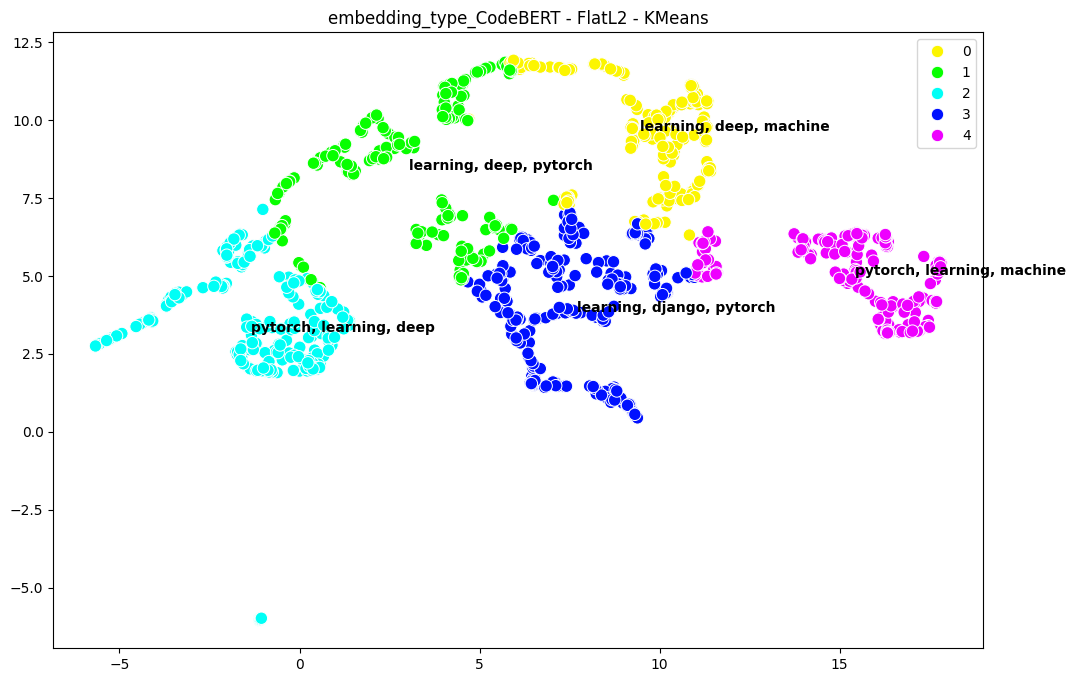

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


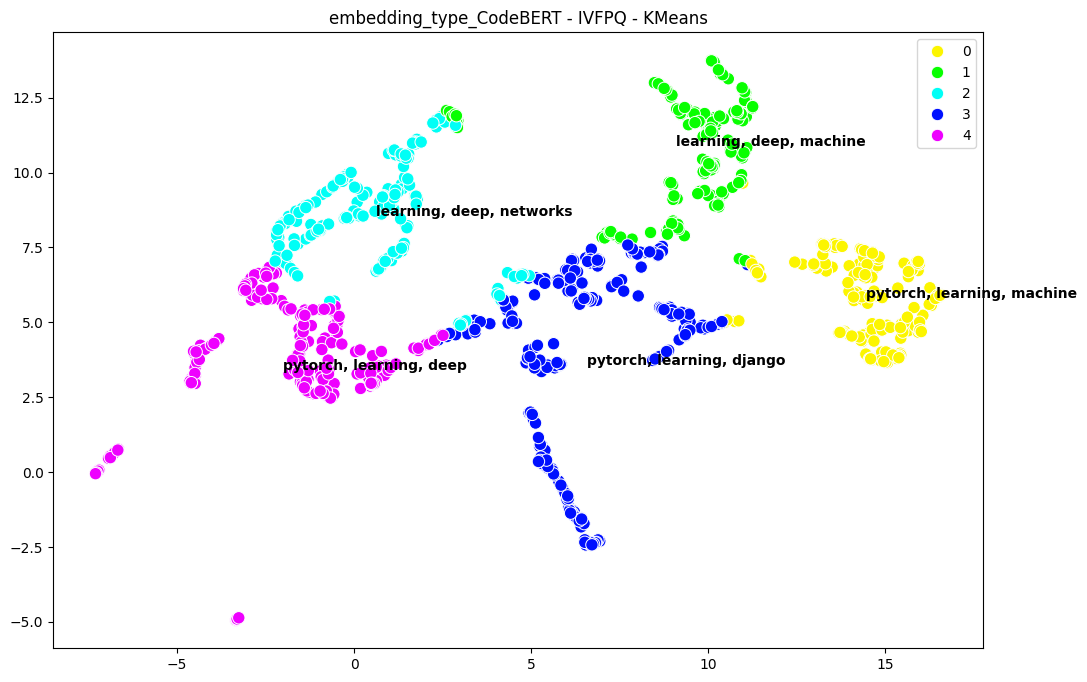

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


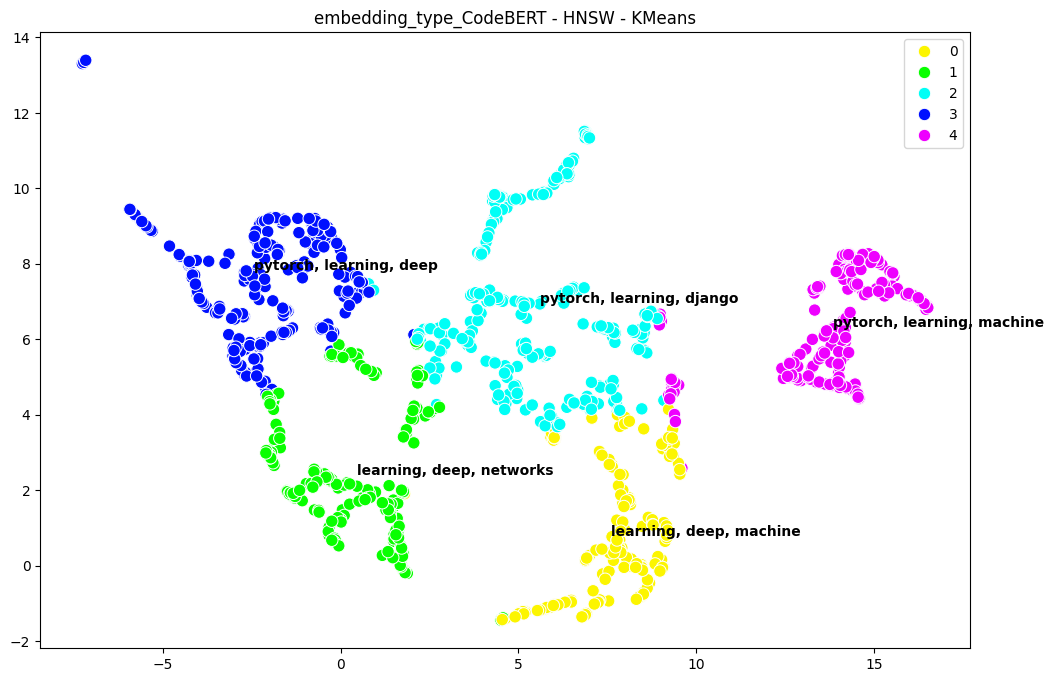

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


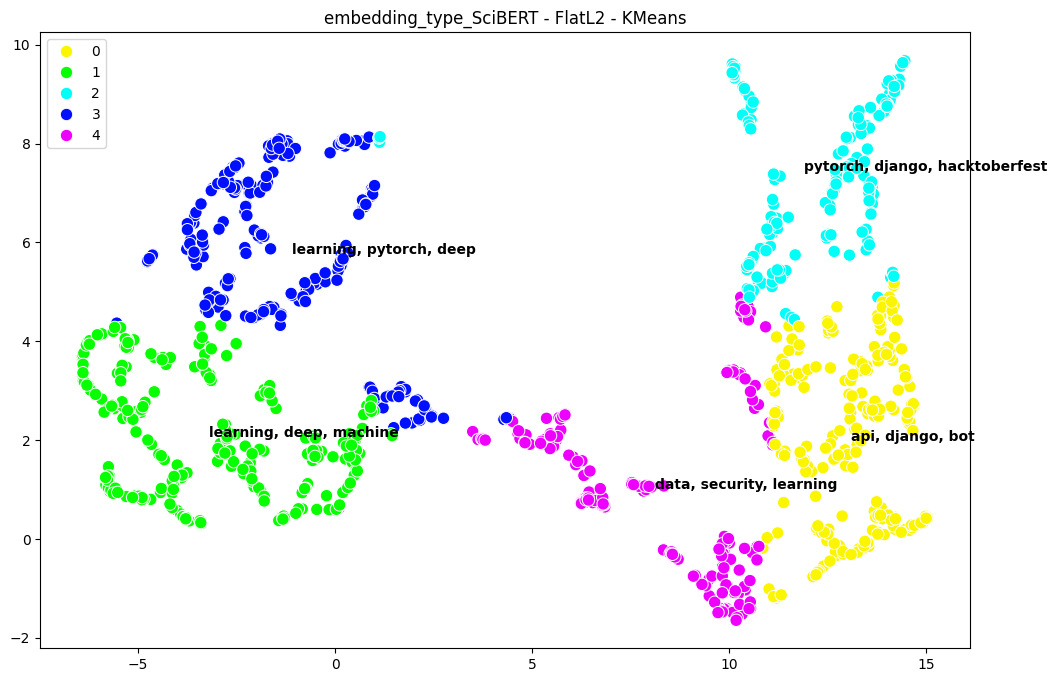

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


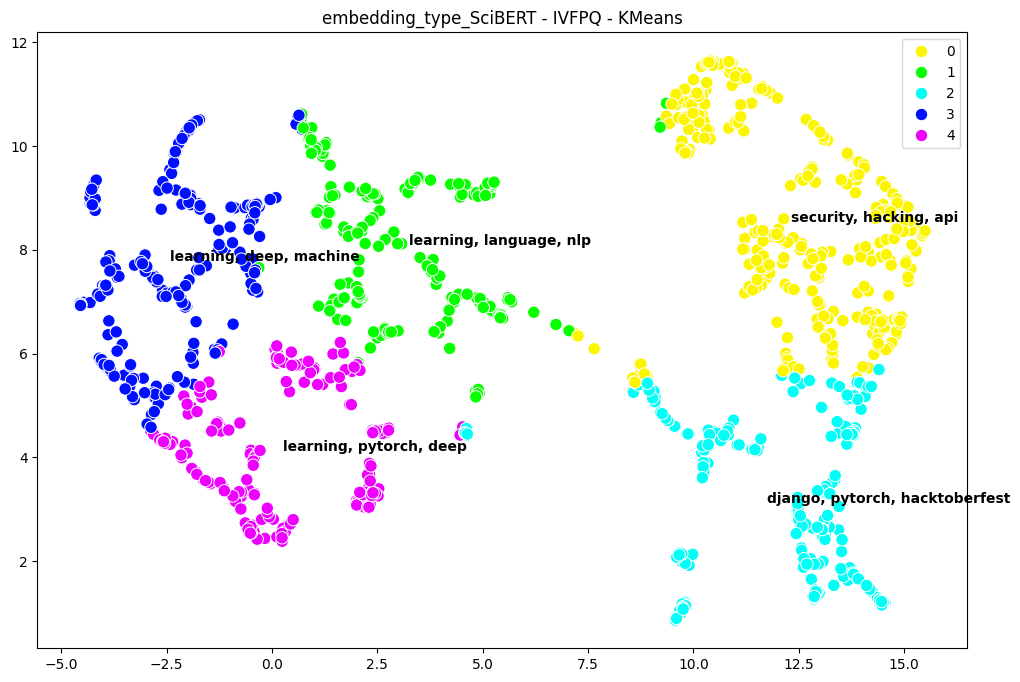

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


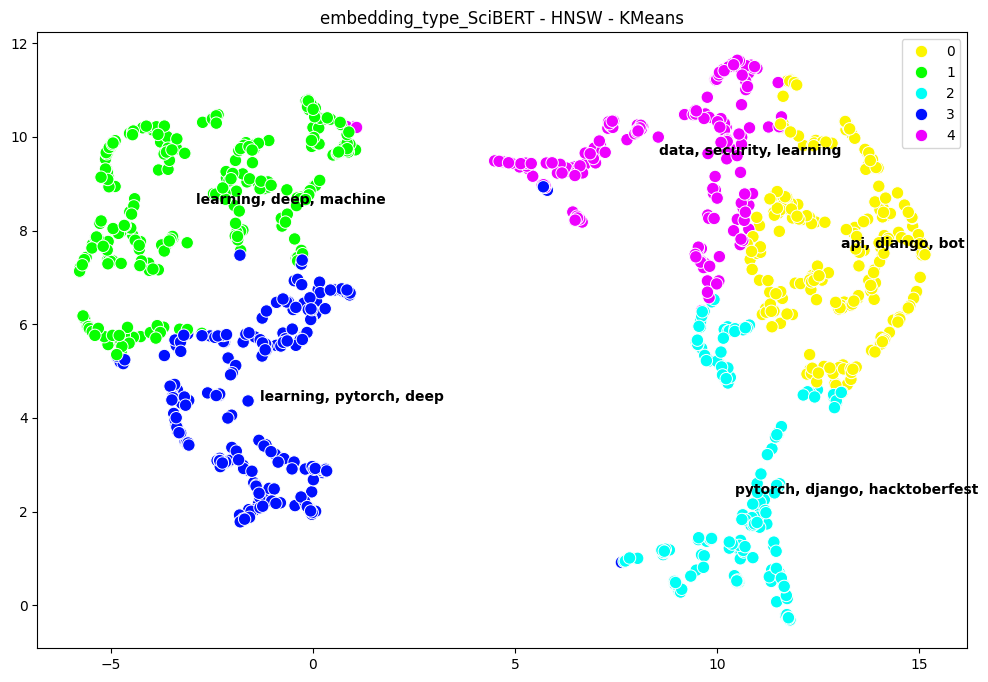

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


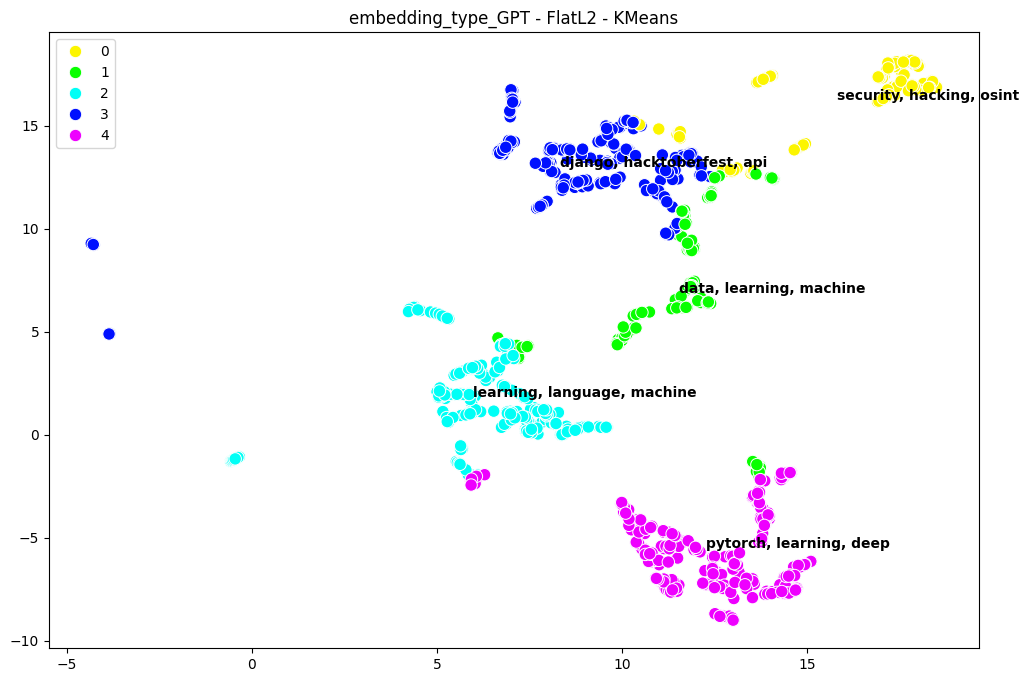

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


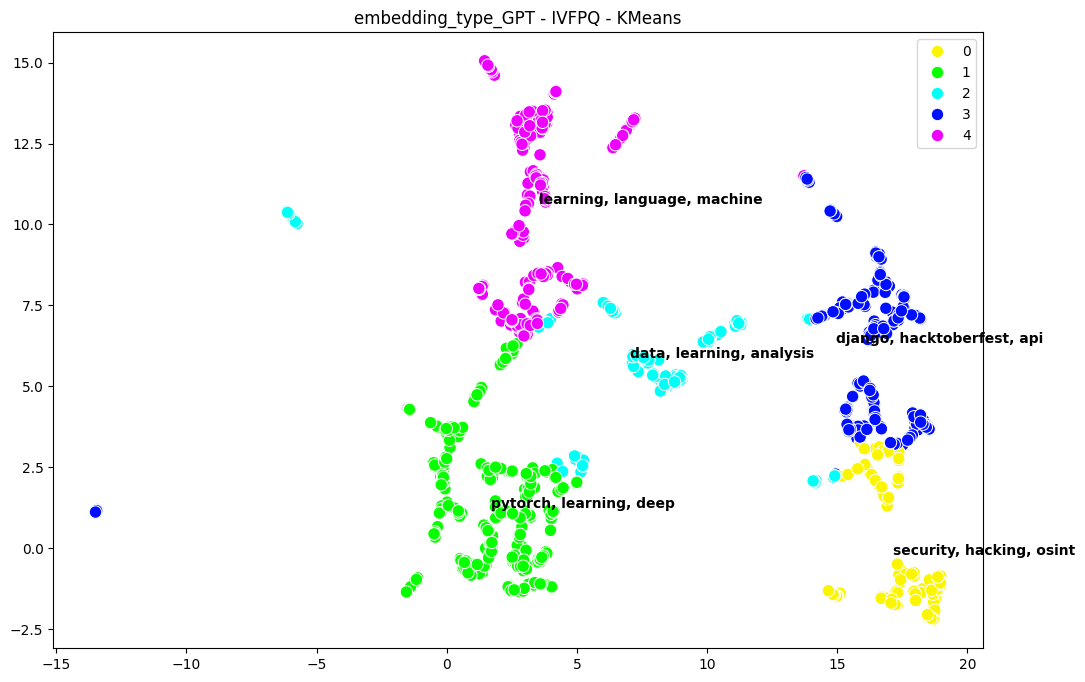

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


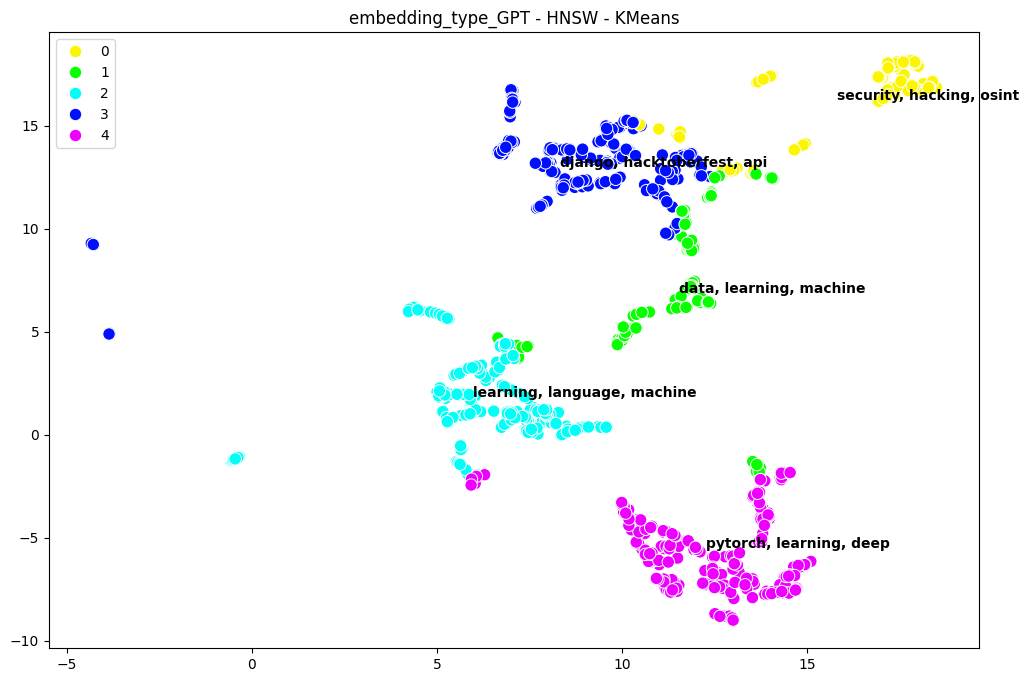


All results saved to: plots/clustering_results.xlsx


In [23]:
embedding_columns = ['embedding_type_CodeBERT', 'embedding_type_SciBERT', 'embedding_type_GPT']
index_types = ['FlatL2', 'IVFPQ', 'HNSW']
sample_results_df = visualize_all_combinations_with_clustering(sample_df, embedding_columns, index_types)

In [24]:
sample_results_df.sort_values(by='Davies_Bouldin_Index').sort_values(by='Silhouette_Score')

Embedding Index_Type  Silhouette_Score  Davies_Bouldin_Index
3   embedding_type_SciBERT     FlatL2          0.393840              0.934203
5   embedding_type_SciBERT       HNSW          0.395904              0.913736
0  embedding_type_CodeBERT     FlatL2          0.409560              0.775524
4   embedding_type_SciBERT      IVFPQ          0.412022              0.815527
1  embedding_type_CodeBERT      IVFPQ          0.412197              0.764253
2  embedding_type_CodeBERT       HNSW          0.416364              0.751133
7       embedding_type_GPT      IVFPQ          0.458032              0.741408
6       embedding_type_GPT     FlatL2          0.461400              0.728311
8       embedding_type_GPT       HNSW          0.461400              0.728311

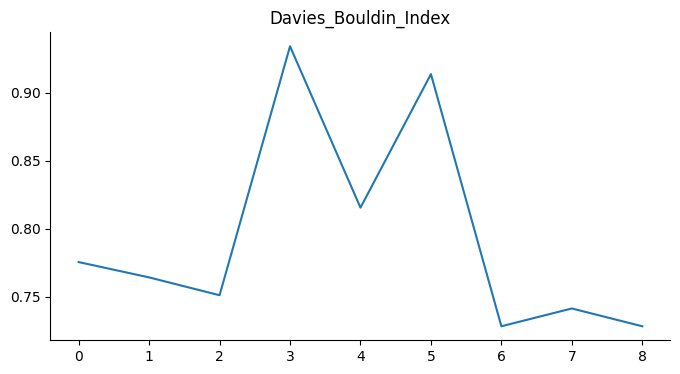

In [25]:
sample_results_df['Davies_Bouldin_Index'].plot(kind='line', figsize=(8, 4), title='Davies_Bouldin_Index')
plt.gca().spines[['top', 'right']].set_visible(False)

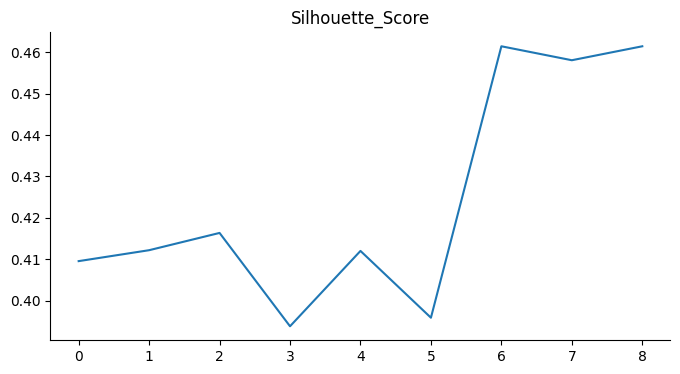

In [26]:
sample_results_df['Silhouette_Score'].plot(kind='line', figsize=(8, 4), title='Silhouette_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

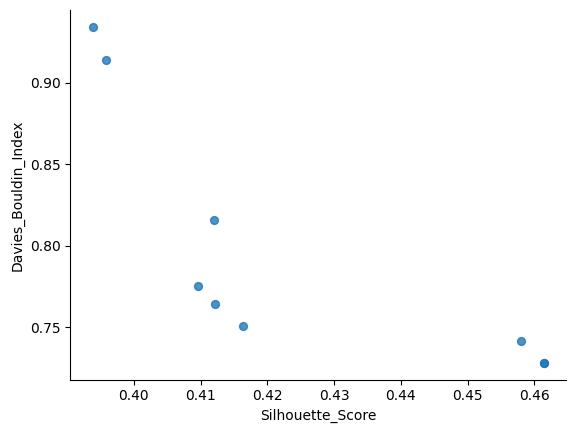

In [27]:
sample_results_df.plot(kind='scatter', x='Silhouette_Score', y='Davies_Bouldin_Index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
sample_results_df[sample_results_df['Davies_Bouldin_Index']<0.8].sort_values(by='Silhouette_Score')

Embedding Index_Type  Silhouette_Score  Davies_Bouldin_Index
0  embedding_type_CodeBERT     FlatL2          0.409560              0.775524
1  embedding_type_CodeBERT      IVFPQ          0.412197              0.764253
2  embedding_type_CodeBERT       HNSW          0.416364              0.751133
7       embedding_type_GPT      IVFPQ          0.458032              0.741408
6       embedding_type_GPT     FlatL2          0.461400              0.728311
8       embedding_type_GPT       HNSW          0.461400              0.728311

### All Data Process

In [29]:
embeded_df = generate_embeddings(clean_df, "GPT")

Generating Embeddings for GPT: 100%|██████████████████████████████| 117/117 [03:46<00:00,  1.93s/it]


In [30]:
# embeded_df = embeded_df[["Name",	"Description",	"URL",	"Created At",
#                          "Updated At",	"Size",	"Stars", "Topics",
#                          "Overlap_Score",	"Common_Words",	"Year",	"embedding_type_GPT"]]

In [31]:
embedding_columns = ['embedding_type_GPT']
index_types = ['HNSW']
embeded_df = process_all_indices(embeded_df, embedding_columns, index_types, output_folder="indexes")
mlflow.end_run()

In [32]:
embeded_df.head()

Name                                        Description  \
0              PyPOTS  toolboxlibrary data mining partially observed ...   
1  changedetection.io  best simplest free open source website change ...   
2            swarmlib  repository implements swarm optimization algor...   
3     instagrapi-rest          restful api wrapper instagram private api   
4          scrapydweb  web app scrapyd cluster scrapy log analysis au...   

                                              URL          Created At  \
0              https://github.com/WenjieDu/PyPOTS 2022-03-29 14:22:47   
1  https://github.com/dgtlmoon/changedetection.io 2021-01-27 16:03:30   
2              https://github.com/HaaLeo/swarmlib 2018-11-04 16:47:18   
3    https://github.com/subzeroid/instagrapi-rest 2021-03-15 10:01:47   
4            https://github.com/my8100/scrapydweb 2018-09-30 19:11:44   

           Updated At    Size  Stars  \
0 2023-09-25 04:20:18    7812    438   
1 2023-09-21 11:00:40    6801  11908   
2 2023-09-20 12:39:17  201738    373   
3 2023-09-23 10:20:03     127    333   
4 2023-09-24 04:19:48    3196   2817   

                                              Topics  Overlap_Score  \
0  classification, clustering, data mining, forec...             37   
1  back in stock, change alert, change detection,...             27   
2  aco, ant colony optimization, artificial bee c...             25   
3  instagram, instagram api, instagram bot, insta...             25   
4  dashboard, log analysis, log parsing, scrapy, ...             24   

                                        Common_Words  Year  \
0  ['data', 'forecasting', 'incomplete', 'irregul...  2022   
1  ['change', 'defacement', 'detection', 'monitor...  2021   
2  ['algorithm', 'algorithms', 'ant', 'artificial...  2018   
3                    ['api', 'instagram', 'private']  2021   
4  ['analysis', 'cluster', 'log', 'monitor', 'scr...  2018   

                                  embedding_type_GPT  \
0  [-0.013563501875932178, -0.011892540694414989,...   
1  [-0.01138204051801678, -0.007720453165301621, ...   
2  [0.014197298053074927, 0.009144729759095712, -...   
3  [-0.03370784115837259, -0.016761097523772712, ...   
4  [-0.0024521956917585223, -0.000882586372968102...   

                                               index  
0  <faiss.swigfaiss_avx512.IndexHNSWFlat; proxy o...  
1  <faiss.swigfaiss_avx512.IndexHNSWFlat; proxy o...  
2  <faiss.swigfaiss_avx512.IndexHNSWFlat; proxy o...  
3  <faiss.swigfaiss_avx512.IndexHNSWFlat; proxy o...  
4  <faiss.swigfaiss_avx512.IndexHNSWFlat; proxy o...

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


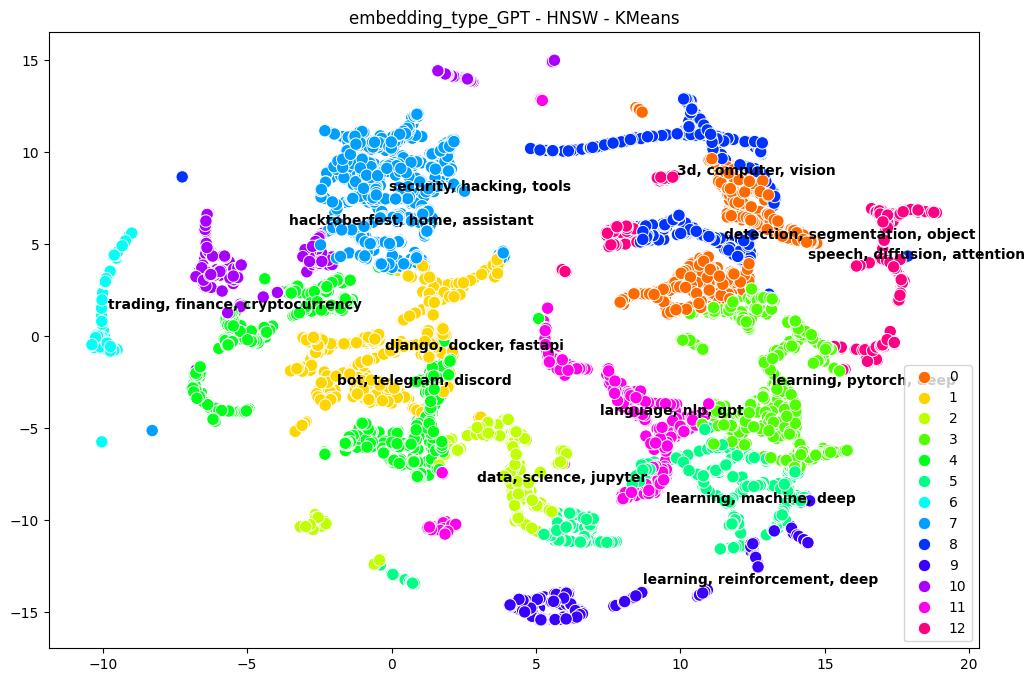


All results saved to: plots/clustering_results.xlsx


In [38]:
results_df = visualize_all_combinations_with_clustering(clean_df, embedding_columns, index_types, k=13)

In [39]:
results_df

Embedding Index_Type  Silhouette_Score  Davies_Bouldin_Index
0  embedding_type_GPT       HNSW           0.40595               0.79184

# Load Index LangChain retriever

In [74]:
from langchain.vectorstores.faiss import FAISS
from langchain.docstore import InMemoryDocstore
from langchain.schema import Document


embedding_model = OpenAIEmbeddings(model = "text-embedding-ada-002")
faiss_index = 'HNSW'


docs = []
for i, row in clean_df.iterrows():
    content = ", ".join(row["Topics"]) if isinstance(row["Topics"], list) else row["Topics"]
    metadata = {
        "name": row["Name"],
        "url": row["URL"],
        "description": row["Description"],
        "stars": row["Stars"]
    }
    docs.append(Document(page_content=content, metadata=metadata))


docstore = InMemoryDocstore({str(i): doc for i, doc in enumerate(docs)})
index_to_docstore_id = {i: str(i) for i in range(len(docs))}

vectorstore = FAISS(
    embedding_function=embedding_model,
    index=faiss_index,
    docstore=docstore,
    index_to_docstore_id=index_to_docstore_id
)


# Query

In [75]:
from langchain.tools import Tool


def search_github_projects(query: str, min_year=None, min_stars=None, top_k=5, sort_by="relevance"):

    results = retriever.invoke(query)

    filtered = []
    for doc in results:
        meta = doc.metadata
        if min_year and meta.get("Year", 0) < min_year:
            continue
        if min_stars and meta.get("stars", 0) < min_stars:
            continue
        filtered.append(doc)

    if sort_by == "latest":
        filtered = sorted(filtered, key=lambda d: clean_df.loc[clean_df["Name"] == d.metadata["name"], "Updated At"].values[0], reverse=True)
    elif sort_by == "stars":
        filtered = sorted(filtered, key=lambda d: d.metadata.get("stars", 0), reverse=True)

    if top_k:
        filtered = filtered[:top_k]

    output = ""
    for doc in filtered:
        meta = doc.metadata
        output += f"Name: {meta['name']}\n"
        output += f"Description: {meta['description']}\n"
        output += f"Stars: {meta['stars']}\n"
        output += f"URL: {meta['url']}\n\n"

    return "Final Answer:\n" + output.strip()




In [76]:
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

agent = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)


In [77]:
response = agent.invoke({"input": "Find GitHub projects related to real-time anomaly detection."})
print(response["output"])



> Entering new AgentExecutor chain...
I should use SmartGitHubSearch to search for projects related to real-time anomaly detection.
Action: SmartGitHubSearch
Action Input: "show me recent projects about real-time anomaly detection"
Observation: Final Answer:
Name: Anomaly-Transformer
Description: code release anomaly transformer time series anomaly detection association discrepancy iclr
Stars: 434
URL: https://github.com/thuml/Anomaly-Transformer

Name: adtk
Description: toolkit rule basedunsupervised anomaly detection time series
Stars: 967
URL: https://github.com/arundo/adtk

Name: ano_pred_cvpr2018
Description: official implementation future frame prediction anomaly detection new cvpr
Stars: 411
URL: https://github.com/StevenLiuWen/ano_pred_cvpr2018

Name: pysad
Description: streaming anomaly detection framework outlier detection streaming data
Stars: 200
URL: https://github.com/selimfirat/pysad

Name: banpei
Description: anomaly detection singular spectrum transformationsst
Stars

In [88]:
response = agent.invoke({"input": "Find GitHub projects related RAG LLM and NLP."})
print(response["output"])



> Entering new AgentExecutor chain...
I should use SmartGitHubSearch to search for projects related to RAG LLM and NLP.
Action: SmartGitHubSearch
Action Input: "projects related to RAG LLM and NLP"
Observation: FINAL_RESULT:

Final Answer:
Name: languagemodels
Description: explore large language models computer ram
Stars: 1083
URL: https://github.com/jncraton/languagemodels

Name: KR-BERT
Description: korean bert pre trained models kr bert tensorflow pytorch
Stars: 186
URL: https://github.com/snunlp/KR-BERT

Name: SceneGraphParser
Description: toolkit parsing captions natural language scene graphs symbolic representations
Stars: 432
URL: https://github.com/vacancy/SceneGraphParser

Name: webarena
Description: code repo webarena realistic web environment building autonomous agents
Stars: 317
URL: https://github.com/web-arena-x/webarena

Name: fairseq-gec
Description: source code improving grammatical error correction pre training copy augmented architecture unlabeled data
Stars: 237
U